In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [3]:
# import some data to play with
data= pd.read_csv('Company_Data.csv') 

In [4]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [8]:
data2 = pd.cut(data.Sales,bins=[0.16,3.98,6.20,9.46,13.14],labels=['low','medium','average','high'])  

In [9]:
data2

0         high
1         high
2         high
3      average
4       medium
        ...   
395       high
396     medium
397    average
398     medium
399       high
Name: Sales, Length: 400, dtype: category
Categories (4, object): ['low' < 'medium' < 'average' < 'high']

In [10]:
data['Sales']=data2 

In [11]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,average,117,100,4,466,97,Medium,55,14,Yes,Yes
4,medium,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,33,14,Yes,Yes
396,medium,139,23,3,37,120,Medium,55,11,No,Yes
397,average,162,26,12,368,159,Medium,40,18,Yes,Yes
398,medium,100,79,7,284,95,Bad,50,12,Yes,Yes


In [16]:
label_encoder=preprocessing.LabelEncoder()

In [17]:
#Complete df dataset

In [18]:
label_encoder = preprocessing.LabelEncoder()
data['Sales']= label_encoder.fit_transform(data['Sales'])

In [19]:
data['ShelveLoc']=label_encoder.fit_transform(data['ShelveLoc']) 
data['Urban']=label_encoder.fit_transform(data['Urban']) 
data['US']=label_encoder.fit_transform(data['US'])

In [20]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [21]:
data.dropna(inplace=True)

In [23]:
x=data.iloc[:,1:]
y=data['Sales']

In [24]:
x

pd.set_option("display.max_rows", None) 

In [25]:
x 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
5,124,113,13,501,72,0,78,16,0,1
6,115,105,0,45,108,2,71,15,1,0
7,136,81,15,425,120,1,67,10,1,1
8,132,110,0,108,124,2,76,10,0,0
9,132,113,0,131,124,2,76,17,0,1


In [26]:
y

0      1
1      1
2      1
3      0
4      3
5      1
6      0
7      1
8      0
9      3
10     0
11     1
12     2
13     1
14     1
15     0
16     0
17     1
18     4
19     0
20     0
21     1
22     3
23     3
24     1
25     4
26     0
27     3
28     2
29     0
30     4
31     0
32     3
33     0
34     2
35     1
36     0
37     3
38     0
39     2
40     2
41     0
42     1
43     3
44     3
45     3
46     1
47     3
48     2
49     1
50     2
51     3
52     0
53     0
54     3
55     0
56     1
57     2
58     3
59     3
60     0
61     0
62     2
63     0
64     0
65     3
66     0
67     0
68     4
69     0
70     0
71     0
72     3
73     1
74     3
75     0
76     1
77     0
78     3
79     0
80     0
81     0
82     1
83     3
84     2
85     0
86     0
87     1
88     0
89     0
90     3
91     3
92     3
93     0
94     0
95     3
96     1
97     0
98     1
99     3
100    3
101    3
102    3
103    3
104    3
105    3
106    4
107    0
108    2
109    0
110    0
1

In [28]:
data['Sales'].unique()  

array([1, 0, 3, 2, 4], dtype=int64)

In [29]:
data.Sales.value_counts() 

0    169
3    105
1     80
2     34
4     12
Name: Sales, dtype: int64

In [67]:
colnames = list(data.columns) 
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [30]:
 #Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [31]:
#Building Decision Tree Classifier using Entropy Criteria

In [32]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)  
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

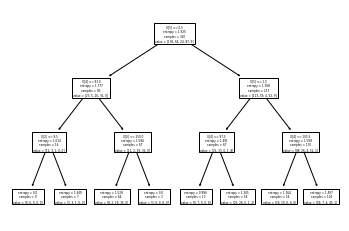

In [33]:
#PLot the decision tree
tree.plot_tree(model);


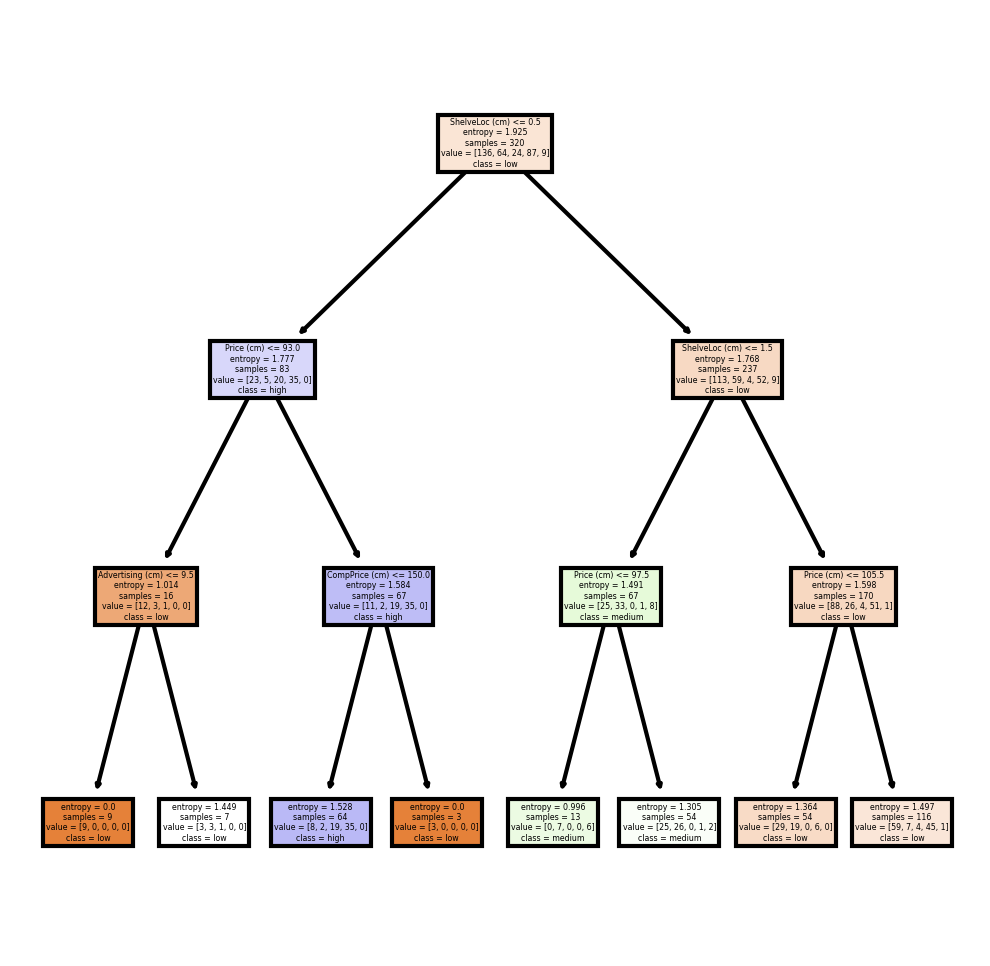

In [34]:
fn=['CompPrice (cm)','Income (cm)','Advertising (cm)','Population (cm)','Price (cm)','ShelveLoc (cm)','Age (cm)','Education (cm)','Urban (cm)','US(cm)]']
cn=['low', 'medium', 'average','high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [35]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_5 <= 0.50
|   |--- feature_4 <= 93.00
|   |   |--- feature_2 <= 9.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  9.50
|   |   |   |--- class: 0
|   |--- feature_4 >  93.00
|   |   |--- feature_0 <= 150.00
|   |   |   |--- class: 3
|   |   |--- feature_0 >  150.00
|   |   |   |--- class: 0
|--- feature_5 >  0.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_4 <= 97.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  97.50
|   |   |   |--- class: 1
|   |--- feature_5 >  1.50
|   |   |--- feature_4 <= 105.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  105.50
|   |   |   |--- class: 0



In [36]:
model.feature_importances_ 

array([0.04720967, 0.        , 0.03429769, 0.        , 0.37178879,
       0.54670385, 0.        , 0.        , 0.        , 0.        ])

In [37]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

ShelveLoc (cm)      0.546704
Price (cm)          0.371789
CompPrice (cm)      0.047210
Advertising (cm)    0.034298
Income (cm)         0.000000
Population (cm)     0.000000
Age (cm)            0.000000
Education (cm)      0.000000
Urban (cm)          0.000000
US(cm)]             0.000000
dtype: float64

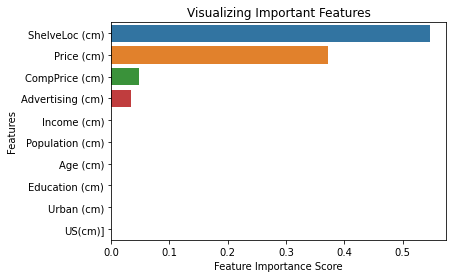

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [39]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    53
1    18
3     9
dtype: int64

In [40]:
preds

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 3, 1, 1, 1, 1, 1, 0, 1, 0, 1, 3, 0, 0, 0, 3, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3], dtype=int64)

In [41]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,3
Sales,,,
0,25,6,2
1,7,9,0
2,6,1,3
3,13,1,4
4,2,1,0


In [42]:
# Accuracy 
np.mean(preds==y_test)

0.475

In [43]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [44]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [45]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [46]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.475

In [47]:
model.feature_importances_ 

array([0.04720967, 0.        , 0.03429769, 0.        , 0.37178879,
       0.54670385, 0.        , 0.        , 0.        , 0.        ])

In [48]:
#Decision Tree Regression Example

In [49]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor  

In [50]:
array = df.values
X = array[:,0:3] 
y = array[:,3] 

NameError: name 'df' is not defined

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)   

In [53]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train, y_train)    

DecisionTreeRegressor(max_depth=3)

In [55]:
#Find the testing accuracy
model.score(x_test,y_test)     

-0.06285965352573819

In [56]:
#Find the training accuracy
model.score(x_train, y_train)  

0.3137630808113403